#### Задание 1:

Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

##### Импорт библиотек и магические команды для настройки matplotlib:

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

##### Загрузка Boston House Prices dataset:

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

##### Создание датафрейма X:

In [5]:
data = boston["data"]
feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##### Создание датафрейма y:

In [6]:
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


##### Разбиение DF X и y на тренировочные и тестовые:

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

##### Импорт и инициализация объекта StandartScaler:

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

##### Масштабирование данных с помощью StandartScaler:

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

##### Построение модели TSNE на тренировочный данных:

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Число признаков уменьшилось с 13 до 2

##### Построение диаграммы рассеяния:

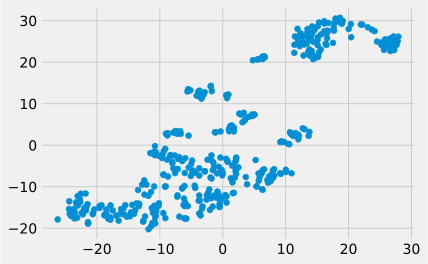

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()